In [1]:
from crypt_currency.api import Api
from crypt_currency.plot import Plot
from crypt_currency.buy_sell import BuySell
from IPython.display import clear_output
import datetime as dt
import time

api = Api()
plot = Plot()
buySell = BuySell()

# 手持ちは3万円
initial_amount = 30000
my_ammount = initial_amount
my_ammount_btc = 0

In [2]:
def exec(api, plot, desig_time):
    clear_output(wait = True)
    # 1時間分のBitcoinの値を取得（1分足）
    val_df = api.get_price(desig_time, period=60, plt_show=True)
    # 移動平均の表示
    plot.show_moving_avg(val_df)
    # 傾きの表示
    plot.show_grad(val_df)

    # 予測
    result = buySell.predict(val_df)
    if result:
        clear_output(wait = True)
        global my_ammount, my_ammount_btc

        if result > 0:
            # 売りの場合はビットコインを持っている必要がある
            if my_ammount_btc > 0:
                # 売れるだけ売る
                my_ammount += result * my_ammount_btc
                my_ammount_btc = 0
                print(f"SELL: - 所持金: {my_ammount}")
        else:
            # 買いの場合は現金を持っている必要必要がある
            # 0.01BTCで考える
            contract_price = result * 0.01
            btc_ammount = - my_ammount // contract_price
            if my_ammount + (contract_price * btc_ammount) >= 0:
                # 買えるだけ買う
                my_ammount += contract_price * btc_ammount
                my_ammount_btc += btc_ammount*0.01
                print(f"BUY: - 所持金: {my_ammount}")

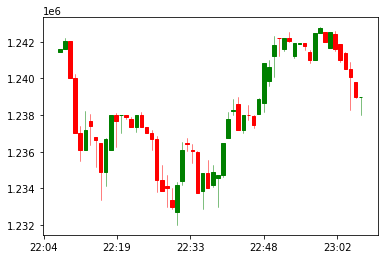

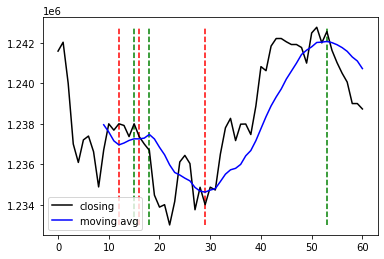

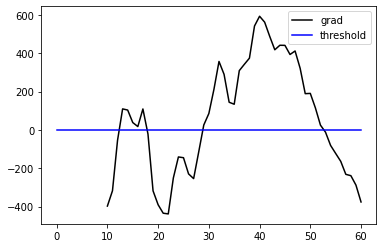

KeyboardInterrupt: 

In [3]:
# シミュレータ環境
date_now = dt.datetime.now() + dt.timedelta(minutes=-30)
for min in range(60):
    designated_time = date_now + dt.timedelta(minutes=-(59-min))
    exec(api, plot, designated_time)
    time.sleep(1)

In [4]:
depo_price_df = api.get_price(date_now, period=60, plt_show=False)
depo_price = depo_price_df["close"][len(depo_price_df) - 1]
print(f"資産: {my_ammount + depo_price*my_ammount_btc}")

資産: 29995.980000000003


In [5]:
# 本番環境
# while True:
#     designated_time = dt.datetime.now(dt.timezone(dt.timedelta(hours=9))
#     exec(api, plot, designated_time)
#     time.sleep(60)